# Movie Based Recommender Engine

## Imporiting the Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv")
df.head()

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [2]:
df.describe()

,Movie ID,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,48.133333,7.696667,0.233333,0.600000,0.100000,0.100000,0.133333,0.100000,0.100000,0.0
std,29.288969,0.666169,0.430183,0.498273,0.305129,0.305129,0.345746,0.305129,0.305129,0.0
min,1.000000,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,27.750000,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,48.500000,7.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,64.250000,8.175000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,98.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [3]:
df.shape

(30, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie ID     30 non-null     int64  
 1   Movie Name   30 non-null     object 
 2   IMDB Rating  30 non-null     float64
 3   Biography    30 non-null     int64  
 4   Drama        30 non-null     int64  
 5   Thriller     30 non-null     int64  
 6   Comedy       30 non-null     int64  
 7   Crime        30 non-null     int64  
 8   Mystery      30 non-null     int64  
 9   History      30 non-null     int64  
 10  Label        30 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ KB


## Exploratory Data Analyisis

In [4]:
#Checking for missing values
print(df.isnull().sum())

Movie ID       0
Movie Name     0
IMDB Rating    0
Biography      0
Drama          0
Thriller       0
Comedy         0
Crime          0
Mystery        0
History        0
Label          0
dtype: int64


In [5]:
#Checking for duplicates
df.duplicated()
df.duplicated().sum()
#No duplicates

0

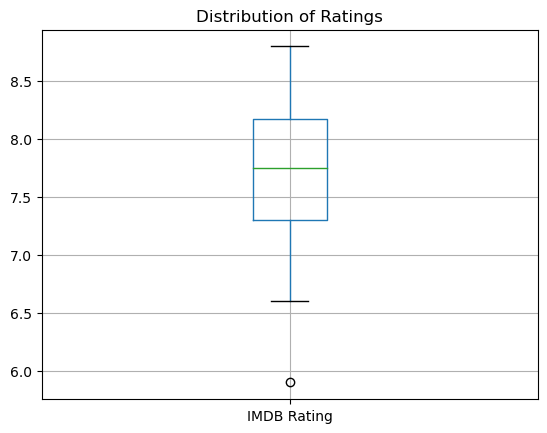

In [12]:
#Creating a boxplot for ratings
df.boxplot(column = ["IMDB Rating"])
plt.title("Distribution of Ratings")
plt.show()

In [5]:
#Dropping Uneccesary Columns
movies = df.drop(columns=["Movie ID", "Movie Name", "Label"])

## Building Recoommender System

In [6]:
#Defining feature vector for the post
the_post = [7.2, 1, 1, 0, 0, 0, 0, 1]

In [7]:
#Implementing the kNN algorithm
knn = NearestNeighbors(n_neighbors = 5, algorithm = "auto", metric = "minkowski")
knn.fit(movies)

NearestNeighbors()

In [8]:
distances, indices = knn.kneighbors([the_post])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [9]:
#Printing Out the Movie Recommendations
print("Movies similar to The Post:")
for index in indices[0]:
    print(df.iloc[index]["Movie Name"])

Movies similar to The Post:
12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
